# <center><b>CV_Project_1_Whole</b></center>

In [1]:
# Using google drive to import data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# For removal of the warnings
import warnings
warnings.filterwarnings("ignore")

# For handling randomness in the output of the models
import numpy as np
import tensorflow as tf
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from zipfile import ZipFile
import cv2
from glob import glob
import random
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# ML related libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# DL related libraries
%tensorflow_version 2.x
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, InputLayer, Flatten, Convolution2D, MaxPooling2D, LeakyReLU, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

## 1. Import the data. Analyse the dimensions of the data. Visualise the data.

<b>Please Note : </b> Creation of data repository was done in one's self GD and zip files were used for faster data access during the GC sesssions.

In [3]:
# Importing the training data

with ZipFile('/content/drive/MyDrive/Colab Data/CV_Project_1/CV_P1_Train_Data.zip', 'r') as z:
  z.extractall()

In [4]:
# Importing the testing data

with ZipFile('/content/drive/MyDrive/Colab Data/CV_Project_1/CV_P1_Test_Data.zip', 'r') as z:
  z.extractall()

In [5]:
# Reading the provided training images and appending in a list

path = '/content/train/*/*.png'
training_images = glob(path)

In [6]:
# Checking the total number of images in our training data

len(training_images)

4767

Thus, here we can see that there are total of 4767 images for training

In [7]:
# Reading the provided testing images and appending in a list

path = '/content/Seedling - Prediction/*.png'
testing_images = glob(path)

In [8]:
# Checking the total number of images in our testing data

len(testing_images)

1

This single image will be used in the final step of the project

In [9]:
testing_images[0]

'/content/Seedling - Prediction/Predict.png'

In [10]:
# Let's check the consistency of images for dimensionality 

for img in training_images[0:10]:
  print(cv2.imread(img).shape)

(566, 566, 3)
(100, 100, 3)
(164, 164, 3)
(93, 93, 3)
(101, 101, 3)
(119, 119, 3)
(108, 108, 3)
(499, 499, 3)
(90, 90, 3)
(229, 229, 3)


As we can see, that the images are of different size and hence we will resize the images to a common dimension in order to provide consistency for our model

Let's visualize them as well before changing their dimensions

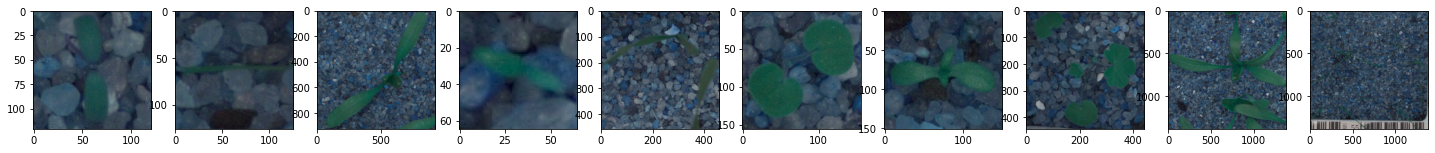

In [11]:
# Displaying random images from training dataset

fig, ax = plt.subplots(1, 10, figsize=(25,10))

for i in range(0,10):
  ax[i].imshow(cv2.imread(training_images[random.randint(0,len(training_images)-1)]))


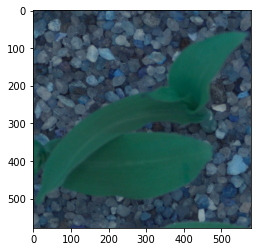

In [12]:
# Displaying the testing image given in prediction folder

plt.imshow(cv2.imread(testing_images[0]))

We can see that all the given images are of decent resolution varying in dimensions and hence we will now resize them to a common dimmension

In [13]:
# Resizing value for images as images are of different sizes
# Selecting the general value used as the dataset is small
# Taking a small value for faster training

resize_value = 128

In [14]:
# Checking time taken for resizing the training images
%%time

# For appending resized images and labels
train_set_images = []
train_set_labels = []
num = len(training_images)
count = 1

for i in training_images:
    print(str(count)+' of '+str(num)+' Done ',end=' | ')
    # Resizing
    train_set_images.append(cv2.resize(cv2.imread(i),(resize_value, resize_value), interpolation = cv2.INTER_CUBIC)) 
    # Extracting labels
    train_set_labels.append(i.split('/')[-2])
    count=count+1




1 of 4767 Done  | 2 of 4767 Done  | 3 of 4767 Done  | 4 of 4767 Done  | 5 of 4767 Done  | 6 of 4767 Done  | 7 of 4767 Done  | 8 of 4767 Done  | 9 of 4767 Done  | 10 of 4767 Done  | 11 of 4767 Done  | 12 of 4767 Done  | 13 of 4767 Done  | 14 of 4767 Done  | 15 of 4767 Done  | 16 of 4767 Done  | 17 of 4767 Done  | 18 of 4767 Done  | 19 of 4767 Done  | 20 of 4767 Done  | 21 of 4767 Done  | 22 of 4767 Done  | 23 of 4767 Done  | 24 of 4767 Done  | 25 of 4767 Done  | 26 of 4767 Done  | 27 of 4767 Done  | 28 of 4767 Done  | 29 of 4767 Done  | 30 of 4767 Done  | 31 of 4767 Done  | 32 of 4767 Done  | 33 of 4767 Done  | 34 of 4767 Done  | 35 of 4767 Done  | 36 of 4767 Done  | 37 of 4767 Done  | 38 of 4767 Done  | 39 of 4767 Done  | 40 of 4767 Done  | 41 of 4767 Done  | 42 of 4767 Done  | 43 of 4767 Done  | 44 of 4767 Done  | 45 of 4767 Done  | 46 of 4767 Done  | 47 of 4767 Done  | 48 of 4767 Done  | 49 of 4767 Done  | 50 of 4767 Done  | 51 of 4767 Done  | 52 of 4767 Done  | 53 of 4767 Done  | 54

In [15]:
training_images_resized = np.array(train_set_images)
training_image_labels = pd.DataFrame(train_set_labels)

In [16]:
# Checking the labels of the images and their distributions througout the given data

training_image_labels.value_counts()

Loose Silky-bent             671
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

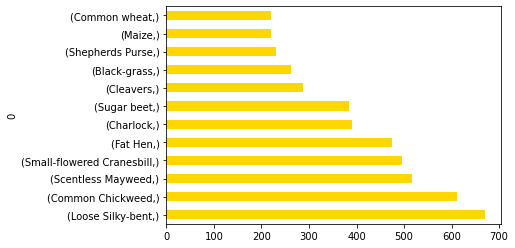

In [17]:
# Visualising the label counts

training_image_labels.value_counts().plot(kind = 'barh',color ='gold');

We can see that the data has imbalances but the classes with low values have decent amount of data for the model to learn

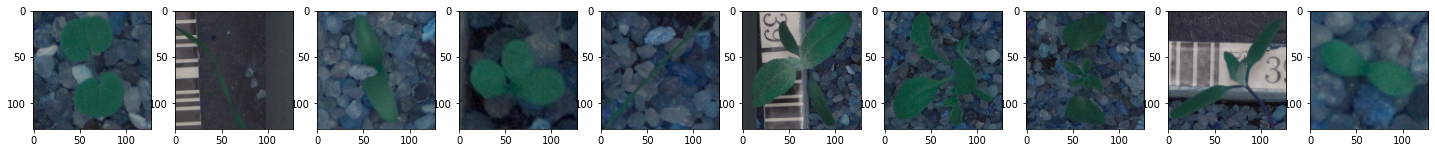

In [18]:
# Displaying random images from training dataset after resizing

fig, ax = plt.subplots(1, 10, figsize=(25,10))

for i in range(0,10):
  ax[i].imshow(training_images_resized[random.randint(0,len(training_images_resized)-1)])


Here we can see that the images are of same dimensions now

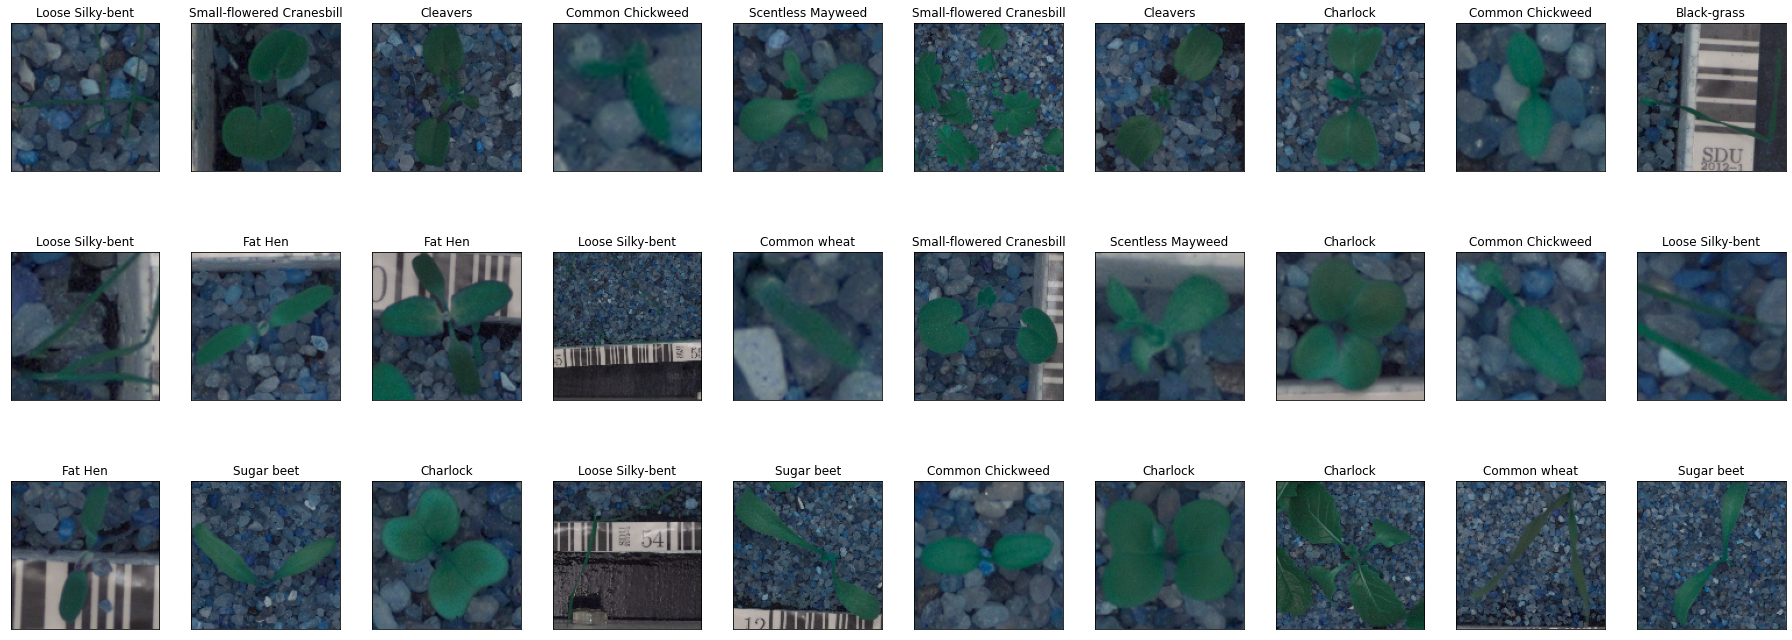

In [19]:
# Displaying random training images with class/label names

fig=plt.figure(figsize=(25, 10))

for i in range(30):
    img = fig.add_subplot(3, 10, i + 1)
    index = np.random.randint(len(training_images_resized) - 1)
    plt.xticks([]),plt.yticks([])
    img.title.set_text(training_image_labels[0][index])
    plt.imshow(training_images_resized[index])

plt.tight_layout()
plt.show()

(128, 128, 3)

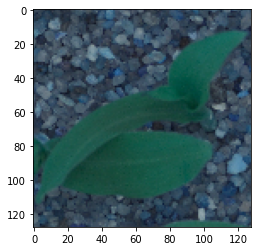

In [20]:
# Resizing the prediction image and displaying the same

img_pred = cv2.imread(testing_images[0])
img_pred_resize = cv2.resize(img_pred,(resize_value,resize_value), interpolation = cv2.INTER_CUBIC)
plt.imshow(img_pred_resize)
# img_predict = np.expand_dims(img_pred_resize, axis=0)
img_pred_resize.shape
# print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

## 2. Design, train, tune and test the best AIML image classifier model using:

In [21]:
# Storing the images in a new variable
X = copy.deepcopy(training_images_resized)

# Storing the target variable in a new variable
y = copy.deepcopy(training_image_labels[0])

In [22]:
X.shape

(4767, 128, 128, 3)

In [23]:
y.shape

(4767,)

In [24]:
# For machine learning models
# Encoding the target variable

enc1 = LabelEncoder()
y_ml = enc1.fit_transform(y)

In [25]:
# For deep learning models
# Encoding the target variable

enc2 = LabelBinarizer()
y_dl = enc2.fit_transform(y)

Now, since we have to capture all the results together for analysis later so let's create dataframe to do so

In [26]:
results = pd.DataFrame(columns=['Model_Name', 'training_Accuracy','validation_Accuracy','training_Loss','validation_Loss'])

In [27]:
# Displaying the format

results

,Model_Name,training_Accuracy,validation_Accuracy,training_Loss,validation_Loss


##<center><b>Supervised Learning</b></center>

In [28]:
# Creating a training and validation set

X_train, X_valid, y_train, y_valid=train_test_split(X,y_ml,test_size=0.25, random_state=seed, stratify = y)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)

X_train: (3575, 128, 128, 3) X_valid: (1192, 128, 128, 3)
y_train: (3575,) y_valid: (1192,)


In [29]:
# Pre-processing the data
# Normalization

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
img_pred_resize = img_pred_resize.astype('float32')

X_train /= 255
X_valid /= 255
img_pred_resize /= 255

In [30]:
y_train_ml = copy.deepcopy(y_train)
y_valid_ml = copy.deepcopy(y_valid)

Now, let's us do some transformations on the current form of data so that it's usable by our models

In [31]:
# Creating variables to split RGB components of the iamges for training images

r_X = []
g_X = []
b_X = []

In [32]:
# Flattening the images based on each channel

for images in X_train:
    r, g, b = cv2.split(images)
    r_X.append(r.flatten())
    g_X.append(g.flatten())
    b_X.append(b.flatten())

In [33]:
# Changing the type for processing

r_X = np.array(r_X)
g_X = np.array(g_X)
b_X = np.array(b_X)

In [34]:
# Storing the training releted data

X_train_r = r_X
X_train_g = g_X
X_train_b = b_X

In [35]:
# Creating variables to split RGB components of the iamges for validation images

r_X = []
g_X = []
b_X = []

In [36]:
# Flattening the images based on each channel

for images in X_valid:
    r, g, b = cv2.split(images)
    r_X.append(r.flatten())
    g_X.append(g.flatten())
    b_X.append(b.flatten())

In [37]:
# Changing the type for processing

r_X = np.array(r_X)
g_X = np.array(g_X)
b_X = np.array(b_X)

In [38]:
# Storing the training releted data

X_valid_r = r_X
X_valid_g = g_X
X_valid_b = b_X

In [39]:
# Checking the shape of the new data

print(X_train_r.shape)
print(X_train_g.shape)
print(X_train_b.shape)

(3575, 16384)
(3575, 16384)
(3575, 16384)


In [40]:
# Checking the shape of the new data

print(X_valid_r.shape)
print(X_valid_g.shape)
print(X_valid_b.shape)

(1192, 16384)
(1192, 16384)
(1192, 16384)


Hence, we can see that we have transformed our training and validation data

Now, we can see that our data has more features that the number of samples or data points itself and hence it's prone to curse of dimensionality and therefore we will use PCA to reduce the number of features

In [41]:
# Setting up the PCA components
# Value to be chosen after trial and error with multiple values

features_PCA = 1000

In [42]:
# For training data

X_train_PCA_r = PCA(n_components = features_PCA, whiten=True).fit(X_train_r)
X_train_PCA_g = PCA(n_components = features_PCA, whiten=True).fit(X_train_g)
X_train_PCA_b = PCA(n_components = features_PCA, whiten=True).fit(X_train_b)

r_X_train_PCA = X_train_PCA_r.transform(X_train_r)
g_X_train_PCA = X_train_PCA_g.transform(X_train_g)
b_X_train_PCA = X_train_PCA_b.transform(X_train_b)

# Displaying the explained variance

print(X_train_PCA_r.explained_variance_ratio_.sum(), X_train_PCA_g.explained_variance_ratio_.sum(), X_train_PCA_b.explained_variance_ratio_.sum())

0.95518196 0.9394907 0.94662714


In [43]:
# For validation data

X_valid_PCA_r = PCA(n_components = features_PCA, whiten=True).fit(X_valid_r)
X_valid_PCA_g = PCA(n_components = features_PCA, whiten=True).fit(X_valid_g)
X_valid_PCA_b = PCA(n_components = features_PCA, whiten=True).fit(X_valid_b)

r_X_valid_PCA = X_valid_PCA_r.transform(X_valid_r)
g_X_valid_PCA = X_valid_PCA_g.transform(X_valid_g)
b_X_valid_PCA = X_valid_PCA_b.transform(X_valid_b)

# Displaying the explained variance

print(X_valid_PCA_r.explained_variance_ratio_.sum(), X_valid_PCA_g.explained_variance_ratio_.sum(), X_valid_PCA_b.explained_variance_ratio_.sum())

0.99663436 0.9957849 0.99678195


We can see good explaination of variance for the given components

In [44]:
# Let's combine the data from all the channels

X_train_PCA = np.concatenate([r_X_train_PCA, g_X_train_PCA, b_X_train_PCA], axis=1)
X_valid_PCA = np.concatenate([r_X_valid_PCA, g_X_valid_PCA, b_X_valid_PCA], axis=1)

In [45]:
# Checking the new shape of the transformed data

print(X_train_PCA.shape, y_train_ml.shape)
print(X_valid_PCA.shape, y_valid_ml.shape)

(3575, 3000) (3575,)
(1192, 3000) (1192,)


We can see that the number of features has increased as the channels have been combined

Now let's create some supervised learning models and check how they perform on our data set

We shall use hyperparameters tuned model for better results

<b>Please Note : </b> Some of the models have been commented out for the faster execution of the code

<b>[ Random Forest ]</b>

In [46]:
# Tuning the hyperparameters

parameters = {
                #'max_depth': [1,5,10,15,20,45],
                #'max_features': ['auto', 'sqrt'],
                #'min_samples_split': [5, 10],
                'n_estimators': [100, 200]
             }

random_grid = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=3,random_state = seed) 

random_grid_result = random_grid.fit(X_train_PCA, y_train_ml)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Score:  0.2660156712254662
Best Params:  {'n_estimators': 200}


In [47]:
rf_clf = RandomForestClassifier(**random_grid_result.best_params_,random_state = seed)

In [48]:
rf_clf.fit(X_train_PCA, y_train_ml)

RandomForestClassifier(n_estimators=200, random_state=42)

In [49]:
rf_clf.score(X_valid_PCA,y_valid_ml)

0.1644295302013423

In [50]:
# Classification report for Random Forest

print("Classification Report :\n")
print(classification_report(y_valid_ml,rf_clf.predict(X_valid_PCA)))

Classification Report :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.06      0.02      0.03        97
           2       0.00      0.00      0.00        72
           3       0.17      0.40      0.24       153
           4       0.00      0.00      0.00        55
           5       0.09      0.06      0.07       119
           6       0.17      0.50      0.25       168
           7       0.00      0.00      0.00        55
           8       0.26      0.14      0.18       129
           9       0.00      0.00      0.00        58
          10       0.18      0.18      0.18       124
          11       0.07      0.02      0.03        96

    accuracy                           0.16      1192
   macro avg       0.08      0.11      0.08      1192
weighted avg       0.11      0.16      0.12      1192



In [51]:
results = results.append({'Model_Name':'Random Forest',
                          'training_Accuracy': random_grid_result.best_score_,
                          'validation_Accuracy': rf_clf.score(X_valid_PCA,y_valid_ml),
                          'training_Loss': np.nan,
                          'validation_Loss': np.nan                                    
                          },
                         ignore_index=True
                         )

<b>[ Light GBM ]</b>

In [52]:
# # Tuning the hyperparameters

# parameters = {
#              #'num_leaves': sp_randint(10,100), 
#              #'min_child_samples': sp_randint(1, 500), 
#              #'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              #'subsample': sp_uniform(loc=0.2, scale=0.8), 
#              #'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#              #'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#              #'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
#               'reg_lambda': [0, 1e-1],
#              }


# random_grid = RandomizedSearchCV(estimator=LGBMClassifier(),param_distributions=parameters, 
#                           scoring='accuracy', verbose=1, n_jobs=-1,cv=3,random_state=seed) 

# random_grid_result = random_grid.fit(X_train_PCA, y_train_ml)

# print('Best Score: ', random_grid_result.best_score_) 
# print('Best Params: ', random_grid_result.best_params_) 

In [53]:
# lgb_clf = LGBMClassifier(**random_grid_result.best_params_,random_state=seed)

In [54]:
# lgb_clf.fit(X_train_PCA, y_train_ml)

In [55]:
# lgb_clf.score(X_valid_PCA,y_valid_ml)

In [56]:
# # Classification report for Light GBM

# print("Classification Report :\n")
# print(classification_report(y_valid_ml,lgb_clf.predict(X_valid_PCA)))

In [57]:
# results = results.append({'Model_Name':'Light GBM',
#                           'training_Accuracy': random_grid_result.best_score_,
#                           'validation_Accuracy': lgb_clf.score(X_valid_PCA,y_valid_ml),
#                           'training_Loss': np.nan,
#                           'validation_Loss': np.nan                                      
#                           },
#                          ignore_index=True
#                          )

<b>[ ADA Boost ]</b>

In [58]:
# # Tuning the hyperparameters

# parameters = {
#               #'n_estimators':[100,200],
#               'learning_rate':[0.01,0.1]
#              }

# random_grid = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state = seed),param_distributions=parameters, 
#                           scoring='accuracy', verbose=1, n_jobs=-1,cv=3,random_state = seed) 

# random_grid_result = random_grid.fit(X_train_PCA, y_train_ml)

# print('Best Score: ', random_grid_result.best_score_) 
# print('Best Params: ', random_grid_result.best_params_) 

In [59]:
# ab_clf = AdaBoostClassifier(**random_grid_result.best_params_,random_state = seed)

In [60]:
# ab_clf.fit(X_train_PCA, y_train_ml)

In [61]:
# ab_clf.score(X_valid_PCA,y_valid_ml)

In [62]:
# # Classification report for ADA Boost

# print("Classification Report :\n")
# print(classification_report(y_valid_ml,ab_clf.predict(X_valid_PCA)))

In [63]:
# results = results.append({'Model_Name':'ADA Boost',
#                           'training_Accuracy': random_grid_result.best_score_,
#                           'validation_Accuracy': ab_clf.score(X_valid_PCA,y_valid_ml),
#                           'training_Loss': 'Null',
#                           'validation_Loss': 'Null'                                      
#                           },
#                          ignore_index=True
#                          )

<b>[ Logistic Regression ]</b>

In [64]:
# Tuning the hyperparameters

penalty = ['l1', 'l2']

#C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

#class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 

#solver = ['liblinear', 'saga'] 

param_grid = dict(penalty=penalty)

logistic = LogisticRegression()

random_grid = RandomizedSearchCV(estimator=logistic, param_distributions = param_grid, scoring='accuracy',cv = 3, verbose=1, n_jobs=-1) 

random_grid_result = random_grid.fit(X_train_PCA, y_train_ml)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Score:  0.22265612526461512
Best Params:  {'penalty': 'l2'}


In [65]:
lr_clf = LogisticRegression(**random_grid_result.best_params_)

In [66]:
lr_clf.fit(X_train_PCA, y_train_ml)

LogisticRegression()

In [67]:
lr_clf.score(X_valid_PCA,y_valid_ml)

0.11661073825503356

In [68]:
# Classification report for Logistic Regression

print("Classification Report :\n")
print(classification_report(y_valid_ml,lr_clf.predict(X_valid_PCA)))

Classification Report :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.08      0.06      0.07        97
           2       0.05      0.03      0.04        72
           3       0.14      0.20      0.16       153
           4       0.12      0.09      0.10        55
           5       0.08      0.08      0.08       119
           6       0.17      0.20      0.18       168
           7       0.12      0.07      0.09        55
           8       0.14      0.20      0.17       129
           9       0.05      0.05      0.05        58
          10       0.10      0.10      0.10       124
          11       0.09      0.06      0.07        96

    accuracy                           0.12      1192
   macro avg       0.09      0.10      0.09      1192
weighted avg       0.11      0.12      0.11      1192



In [69]:
results = results.append({'Model_Name':'Logistic Regression',
                          'training_Accuracy': random_grid_result.best_score_,
                          'validation_Accuracy': lr_clf.score(X_valid_PCA,y_valid_ml),
                          'training_Loss': np.nan,
                          'validation_Loss': np.nan                                      
                          },
                         ignore_index=True
                         )

<b>[ SVC ]</b>

In [70]:
parameters = {
                #'C': [1, 10, 100, 1000], 
                #'gamma': [0.001, 0.0001],  
                'kernel': ['linear','rbf']}

random_grid = RandomizedSearchCV(estimator=SVC(),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=3,random_state = seed) 

random_grid_result = random_grid.fit(X_train_PCA, y_train_ml)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Score:  0.1918891593739023
Best Params:  {'kernel': 'linear'}


In [71]:
svc_clf = SVC(**random_grid_result.best_params_)

In [72]:
svc_clf.fit(X_train_PCA, y_train_ml)

SVC(kernel='linear')

In [73]:
svc_clf.score(X_valid_PCA,y_valid_ml)

0.11577181208053691

In [74]:
# Classification report for SVC

print("Classification Report :\n")
print(classification_report(y_valid_ml,svc_clf.predict(X_valid_PCA)))

Classification Report :

              precision    recall  f1-score   support

           0       0.06      0.03      0.04        66
           1       0.08      0.07      0.07        97
           2       0.05      0.04      0.05        72
           3       0.17      0.25      0.21       153
           4       0.09      0.09      0.09        55
           5       0.12      0.13      0.13       119
           6       0.15      0.16      0.15       168
           7       0.11      0.07      0.09        55
           8       0.14      0.17      0.15       129
           9       0.06      0.07      0.07        58
          10       0.06      0.04      0.05       124
          11       0.07      0.04      0.05        96

    accuracy                           0.12      1192
   macro avg       0.10      0.10      0.10      1192
weighted avg       0.11      0.12      0.11      1192



In [75]:
results = results.append({'Model_Name':'SVC',
                          'training_Accuracy': random_grid_result.best_score_,
                          'validation_Accuracy': svc_clf.score(X_valid_PCA,y_valid_ml),
                          'training_Loss': np.nan,
                          'validation_Loss': np.nan                                      
                          },
                         ignore_index=True
                         )

<b>Please Note : </b> Some of the models have been commented out for the faster execution of the code

##<center><b>Neural Networks</b></center>

In [76]:
# Creating a training and validation set

X_train, X_valid, y_train, y_valid = train_test_split(X, y_dl, test_size=0.25, random_state = seed)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)

X_train: (3575, 128, 128, 3) X_valid: (1192, 128, 128, 3)
y_train: (3575, 12) y_valid: (1192, 12)


In [77]:
# Pre-processing the data
# Normalization

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')


X_train /= 255
X_valid /= 255

In [78]:
X_train_scaled = copy.deepcopy(X_train)
X_valid_scaled = copy.deepcopy(X_valid)
y_train_dl = copy.deepcopy(y_train)
y_valid_dl = copy.deepcopy(y_valid)

In [79]:
# Function to create multiple ANN models using different values for hyperparameters

def ann_model(height, width, channels, num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag):

    ''' 
    ann_model: Takes a group of variables and creates the model and returns it\n

    height : Height of the image\n

    width : Width of the image\n

    channels : Channels in the image\n
    
    num_layers : Number of layes in NN\n
    
    hidden_neurons : Number of neurons for first layer which gets halved with increase in each layer\n

    bn_flag : To add Batch Normalisation\n

    activation : Type of activation function\n
    
    do_flag : To add Dropout\n

    do_val : Probability for Dropout\n

    kernel_initializer : Values for weights initialisation\n

    lr : Learning rate\n

    Lambda : Regularisation parameter\n

    optimizer_flag : To choose the optimizer as SGD or Adam\n
    
    '''

    # Model architecture
    
    output_neurons = 12
       
    model = Sequential()

    if (num_layers == 1) :
      model.add(InputLayer(input_shape=(height, width, channels)))
      model.add(Flatten())
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    elif (num_layers == 2) :
      model.add(InputLayer(input_shape=(height, width, channels)))
      model.add(Flatten())
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_shape=(height, width, channels)))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    elif (num_layers == 3) :
      model.add(InputLayer(input_shape=(height, width, channels)))
      model.add(Flatten())
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_shape=(height, width, channels)))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    elif (num_layers == 4) :
      model.add(InputLayer(input_shape=(height, width, channels)))
      model.add(Flatten())
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_shape=(height, width, channels)))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2) , kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/8), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    elif (num_layers == 5) :
      model.add(InputLayer(input_shape=(height, width, channels)))
      model.add(Flatten())
      model.add(Dense(hidden_neurons, kernel_initializer=kernel_initializer, input_shape=(height, width, channels)))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/2) , kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/4), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/8), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(int(hidden_neurons/12), kernel_initializer=kernel_initializer))
      if (bn_flag == 1):
        model.add(BatchNormalization())
      model.add(Activation(activation))
      if (do_flag == 1) :
        model.add(Dropout(do_val))
      model.add(Dense(output_neurons, kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(Lambda)))
      model.add(Activation('softmax'))
    else:
      print('The number of layers not within desired range')

    sgd = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
    adam = keras.optimizers.Adam(learning_rate=lr)
    
    # Compiling model
    
    if optimizer_flag == 1:
      model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = 'accuracy')
    elif optimizer_flag == 2:
      model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = 'accuracy')

    return model 

<b>ANN Model 1</b>

In [80]:
# Choosing the hyperparameters

height = 128
width = 128
channels = 3
num_layers = 2 
hidden_neurons = 300
bn_flag = 1
activation = 'relu'
do_flag = 1
do_val = 0.2
kernel_initializer = 'he_normal'
lr = 0.0003
Lambda = 0
optimizer_flag = 2

In [81]:
ann_model_1 = ann_model(height, width, channels, num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [82]:
ann_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 300)               14745900  
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                        

In [83]:
# Parameter values for fitting the model

epochs = 50
batch_size = 100

In [84]:
# Fitting the model

ann_model_1_fit = ann_model_1.fit(X_train_scaled, y_train_dl, validation_data=(X_valid_scaled,y_valid_dl), epochs=epochs, verbose = 1)

Epoch 1/50
112/112 [==============================] - 4s 12ms/step - loss: 2.3181 - accuracy: 0.2520 - val_loss: 3.3643 - val_accuracy: 0.1384
Epoch 2/50
112/112 [==============================] - 1s 9ms/step - loss: 1.5536 - accuracy: 0.4987 - val_loss: 2.5715 - val_accuracy: 0.2223
Epoch 3/50
112/112 [==============================] - 1s 9ms/step - loss: 1.2185 - accuracy: 0.6143 - val_loss: 2.5262 - val_accuracy: 0.3784
Epoch 4/50
112/112 [==============================] - 1s 9ms/step - loss: 0.9708 - accuracy: 0.7097 - val_loss: 2.3261 - val_accuracy: 0.2886
Epoch 5/50
112/112 [==============================] - 1s 9ms/step - loss: 0.7959 - accuracy: 0.7701 - val_loss: 1.6740 - val_accuracy: 0.4513
Epoch 6/50
112/112 [==============================] - 1s 9ms/step - loss: 0.6392 - accuracy: 0.8249 - val_loss: 2.5044 - val_accuracy: 0.3834
Epoch 7/50
112/112 [==============================] - 1s 9ms/step - loss: 0.5444 - accuracy: 0.8593 - val_loss: 2.7354 - val_accuracy: 0.3968
Epoch

In [85]:
training_loss_1, training_accuracy_1 = ann_model_1.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [86]:
validation_loss_1, validation_accuracy_1 = ann_model_1.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [87]:
results = results.append({'Model_Name':'ANN_Model_1',
                          'training_Accuracy': training_accuracy_1,
                          'validation_Accuracy': validation_accuracy_1,
                          'training_Loss': training_loss_1,
                          'validation_Loss': validation_loss_1                                      
                          },
                         ignore_index=True
                         )

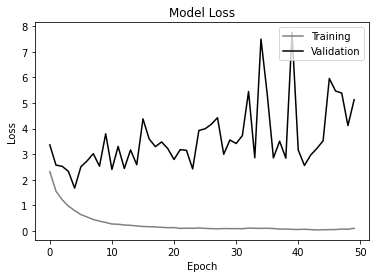

In [88]:
# Summarizing the history for loss

plt.plot(ann_model_1_fit.history['loss'],color = 'Grey')
plt.plot(ann_model_1_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

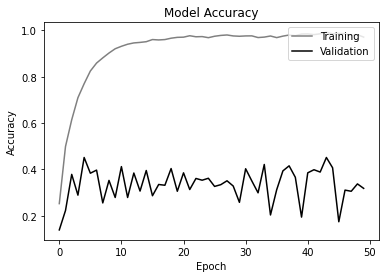

In [89]:
# Summarizing the history for accuracy

plt.plot(ann_model_1_fit.history['accuracy'],color = 'Grey')
plt.plot(ann_model_1_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

<b>ANN Model 2</b>

In [90]:
# Choosing the hyperparameters

num_layers = 4 
hidden_neurons = 1024
bn_flag = 1
activation = 'relu'
do_flag = 1
do_val = 0.2
kernel_initializer = 'he_normal'
lr = 0.000001
Lambda = 0
optimizer_flag = 2

In [91]:
ann_model_2 = ann_model(height, width, channels, num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [92]:
ann_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              50332672  
                                                                 
 batch_normalization_2 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 1024)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                      

In [93]:
# Parameter values for fitting the model

epochs = 100
batch_size = 100

In [94]:
# Fitting the model

ann_model_2_fit = ann_model_2.fit(X_train_scaled, y_train_dl, validation_data=(X_valid_scaled,y_valid_dl), epochs=epochs, verbose = 1)

Epoch 1/100
112/112 [==============================] - 3s 17ms/step - loss: 3.1210 - accuracy: 0.0792 - val_loss: 2.5096 - val_accuracy: 0.1007
Epoch 2/100
112/112 [==============================] - 2s 14ms/step - loss: 3.0511 - accuracy: 0.0867 - val_loss: 2.5572 - val_accuracy: 0.0872
Epoch 3/100
112/112 [==============================] - 2s 14ms/step - loss: 2.9920 - accuracy: 0.0917 - val_loss: 2.5908 - val_accuracy: 0.0780
Epoch 4/100
112/112 [==============================] - 2s 14ms/step - loss: 2.9129 - accuracy: 0.0915 - val_loss: 2.6085 - val_accuracy: 0.0864
Epoch 5/100
112/112 [==============================] - 2s 14ms/step - loss: 2.8672 - accuracy: 0.1027 - val_loss: 2.5910 - val_accuracy: 0.1040
Epoch 6/100
112/112 [==============================] - 2s 14ms/step - loss: 2.8510 - accuracy: 0.1099 - val_loss: 2.5508 - val_accuracy: 0.1099
Epoch 7/100
112/112 [==============================] - 2s 14ms/step - loss: 2.7667 - accuracy: 0.1194 - val_loss: 2.5475 - val_accuracy:

In [95]:
training_loss_2, training_accuracy_2 = ann_model_2.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [96]:
validation_loss_2, validation_accuracy_2 = ann_model_2.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [97]:
results = results.append({'Model_Name':'ANN_Model_2',
                          'training_Accuracy': training_accuracy_2,
                          'validation_Accuracy': validation_accuracy_2,
                          'training_Loss': training_loss_2,
                          'validation_Loss': validation_loss_2                                      
                          },
                         ignore_index=True
                         )

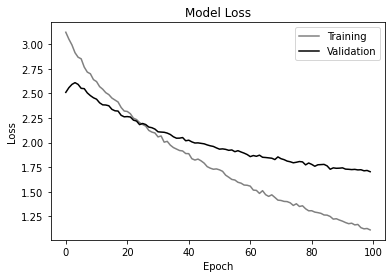

In [98]:
# Summarizing the history for loss

plt.plot(ann_model_2_fit.history['loss'],color = 'Grey')
plt.plot(ann_model_2_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

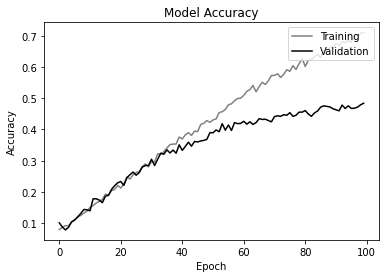

In [99]:
# Summarizing the history for accuracy

plt.plot(ann_model_2_fit.history['accuracy'],color = 'Grey')
plt.plot(ann_model_2_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

<b>ANN Model 3</b>

In [100]:
# Choosing the hyperparameters

num_layers = 5 
hidden_neurons = 2048
bn_flag = 1
activation = 'relu'
do_flag = 1
do_val = 0.2
kernel_initializer = 'he_normal'
lr = 0.000001
Lambda = 0
optimizer_flag = 2

In [101]:
ann_model_3 = ann_model(height, width, channels, num_layers, hidden_neurons, bn_flag, activation, do_flag, do_val, kernel_initializer, lr, Lambda, optimizer_flag)

In [102]:
ann_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_8 (Dense)             (None, 2048)              100665344 
                                                                 
 batch_normalization_6 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 2048)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                      

In [103]:
# Parameter values for fitting the model

epochs = 100
batch_size = 100

In [104]:
# Fitting the model

ann_model_3_fit = ann_model_3.fit(X_train_scaled, y_train_dl, validation_data=(X_valid_scaled,y_valid_dl), epochs=epochs, verbose = 1)

Epoch 1/100
112/112 [==============================] - 4s 22ms/step - loss: 3.0447 - accuracy: 0.0800 - val_loss: 2.5882 - val_accuracy: 0.0487
Epoch 2/100
112/112 [==============================] - 2s 18ms/step - loss: 2.9671 - accuracy: 0.0862 - val_loss: 2.6041 - val_accuracy: 0.0537
Epoch 3/100
112/112 [==============================] - 2s 19ms/step - loss: 2.9511 - accuracy: 0.0948 - val_loss: 2.5689 - val_accuracy: 0.0872
Epoch 4/100
112/112 [==============================] - 2s 19ms/step - loss: 2.9087 - accuracy: 0.1007 - val_loss: 2.5556 - val_accuracy: 0.0906
Epoch 5/100
112/112 [==============================] - 2s 19ms/step - loss: 2.8314 - accuracy: 0.1069 - val_loss: 2.5422 - val_accuracy: 0.0948
Epoch 6/100
112/112 [==============================] - 2s 19ms/step - loss: 2.8308 - accuracy: 0.1063 - val_loss: 2.5079 - val_accuracy: 0.1149
Epoch 7/100
112/112 [==============================] - 2s 19ms/step - loss: 2.7897 - accuracy: 0.1169 - val_loss: 2.4790 - val_accuracy:

In [105]:
training_loss_3, training_accuracy_3 = ann_model_3.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [106]:
validation_loss_3, validation_accuracy_3 = ann_model_3.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [107]:
results = results.append({'Model_Name':'ANN_Model_3',
                          'training_Accuracy': training_accuracy_3,
                          'validation_Accuracy': validation_accuracy_3,
                          'training_Loss': training_loss_3,
                          'validation_Loss': validation_loss_3                                      
                          },
                         ignore_index=True
                         )

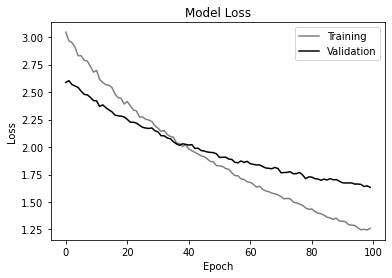

In [108]:
# Summarizing the history for loss

plt.plot(ann_model_3_fit.history['loss'],color = 'Grey')
plt.plot(ann_model_3_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

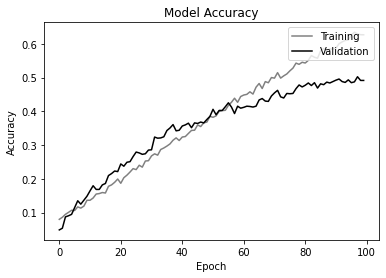

In [109]:
# Summarizing the history for accuracy

plt.plot(ann_model_3_fit.history['accuracy'],color = 'Grey')
plt.plot(ann_model_3_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##<center><b>CNN</b></center>

<b>CNN Model 1</b>

In [110]:
cnn_model_1 = Sequential()

# CNN
cnn_model_1.add(tf.keras.layers.InputLayer(input_shape=(resize_value,resize_value,3)))

cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Convolution2D(filters=32, kernel_size= 3, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=2))

cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=2))

cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=2))

cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Convolution2D(filters=256, kernel_size=2, padding='same', activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=2))

# Flattening data for FC layer
cnn_model_1.add(Flatten()) 

# FC layer
cnn_model_1.add(Dense(units=128,activation = 'relu'))

cnn_model_1.add(Dense(units = 64, activation = 'relu'))

cnn_model_1.add(Dense(units = 32, activation = 'relu'))

cnn_model_1.add(Dense(units = 12, activation = 'softmax'))


In [111]:
cnn_model_1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [112]:
cnn_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_11 (Bat  (None, 128, 128, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 batch_normalization_12 (Bat  (None, 63, 63, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        32832     
                                                      

In [113]:
# Parameter values for fitting the model

epochs = 20
batch_size = 100

In [114]:
cnn_model_1_fit = cnn_model_1.fit(X_train_scaled, y_train_dl, epochs = epochs, validation_data = (X_valid_scaled,y_valid_dl))

Epoch 1/20
112/112 [==============================] - 11s 28ms/step - loss: 1.8828 - accuracy: 0.4064 - val_loss: 3.5481 - val_accuracy: 0.1485
Epoch 2/20
112/112 [==============================] - 2s 22ms/step - loss: 0.9470 - accuracy: 0.6982 - val_loss: 4.7783 - val_accuracy: 0.1510
Epoch 3/20
112/112 [==============================] - 2s 22ms/step - loss: 0.6972 - accuracy: 0.7729 - val_loss: 3.1564 - val_accuracy: 0.2760
Epoch 4/20
112/112 [==============================] - 2s 22ms/step - loss: 0.5798 - accuracy: 0.8022 - val_loss: 0.8430 - val_accuracy: 0.7315
Epoch 5/20
112/112 [==============================] - 2s 22ms/step - loss: 0.4584 - accuracy: 0.8476 - val_loss: 1.1084 - val_accuracy: 0.7072
Epoch 6/20
112/112 [==============================] - 2s 22ms/step - loss: 0.3627 - accuracy: 0.8738 - val_loss: 0.6840 - val_accuracy: 0.7643
Epoch 7/20
112/112 [==============================] - 2s 22ms/step - loss: 0.3410 - accuracy: 0.8769 - val_loss: 0.5677 - val_accuracy: 0.836

In [115]:
training_loss_1, training_accuracy_1 = cnn_model_1.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [116]:
validation_loss_1, validation_accuracy_1 = cnn_model_1.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [117]:
results = results.append({'Model_Name':'CNN_Model_1',
                          'training_Accuracy': training_accuracy_1,
                          'validation_Accuracy': validation_accuracy_1,
                          'training_Loss': training_loss_1,
                          'validation_Loss': validation_loss_1                                      
                          },
                         ignore_index=True
                         )

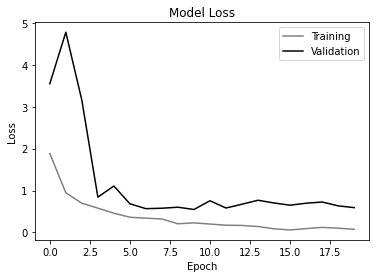

In [118]:
# Summarizing the history for loss

plt.plot(cnn_model_1_fit.history['loss'],color = 'Grey')
plt.plot(cnn_model_1_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

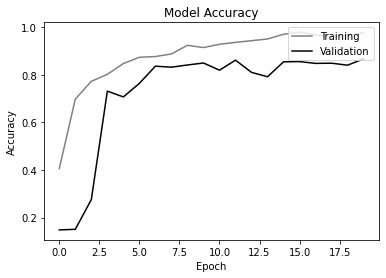

In [119]:
# Summarizing the history for accuracy

plt.plot(cnn_model_1_fit.history['accuracy'],color = 'Grey')
plt.plot(cnn_model_1_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

<b>CNN Model 2</b>

In [120]:
cnn_model_2 = Sequential()

# CNN
cnn_model_2.add(tf.keras.layers.InputLayer(input_shape=(resize_value,resize_value,3)))

cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Convolution2D(filters=32, kernel_size= 3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=2))

cnn_model_2.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=2))


cnn_model_2.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=2))


cnn_model_2.add(Convolution2D(filters=256, kernel_size=2, padding='same', activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=2))

# Flattening for FC Layer
cnn_model_2.add(Flatten()) 

# FC layer
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Dense(units=128,activation = 'relu'))

cnn_model_2.add(Dense(units = 64, activation = 'relu'))

cnn_model_2.add(Dense(units = 32, activation = 'relu'))

cnn_model_2.add(Dense(units = 12, activation = 'softmax'))


In [121]:
cnn_model_2.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [122]:
cnn_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Bat  (None, 128, 128, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                      

In [123]:
# Parameters for the model

epochs = 20
batch_size = 100

In [124]:
cnn_model_2_fit = cnn_model_2.fit(X_train_scaled, y_train_dl, epochs = epochs, validation_data = (X_valid_scaled,y_valid_dl))

Epoch 1/20
112/112 [==============================] - 4s 24ms/step - loss: 1.6886 - accuracy: 0.4338 - val_loss: 2.9726 - val_accuracy: 0.1485
Epoch 2/20
112/112 [==============================] - 2s 21ms/step - loss: 0.9409 - accuracy: 0.6769 - val_loss: 4.6856 - val_accuracy: 0.1611
Epoch 3/20
112/112 [==============================] - 2s 21ms/step - loss: 0.6453 - accuracy: 0.7712 - val_loss: 2.3166 - val_accuracy: 0.3247
Epoch 4/20
112/112 [==============================] - 2s 21ms/step - loss: 0.4883 - accuracy: 0.8243 - val_loss: 1.2434 - val_accuracy: 0.5847
Epoch 5/20
112/112 [==============================] - 2s 21ms/step - loss: 0.4409 - accuracy: 0.8386 - val_loss: 0.8284 - val_accuracy: 0.7492
Epoch 6/20
112/112 [==============================] - 2s 21ms/step - loss: 0.3426 - accuracy: 0.8758 - val_loss: 0.7399 - val_accuracy: 0.7827
Epoch 7/20
112/112 [==============================] - 2s 21ms/step - loss: 0.3039 - accuracy: 0.8906 - val_loss: 0.9017 - val_accuracy: 0.7374

In [125]:
training_loss_2, training_accuracy_2 = cnn_model_2.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [126]:
validation_loss_2, validation_accuracy_2 = cnn_model_2.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [127]:
results = results.append({'Model_Name':'CNN_Model_2',
                          'training_Accuracy': training_accuracy_2,
                          'validation_Accuracy': validation_accuracy_2,
                          'training_Loss': training_loss_2,
                          'validation_Loss': validation_loss_2                                      
                          },
                         ignore_index=True
                         )

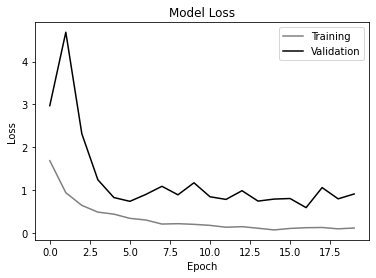

In [128]:
# Summarizing the history for loss

plt.plot(cnn_model_2_fit.history['loss'],color = 'Grey')
plt.plot(cnn_model_2_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

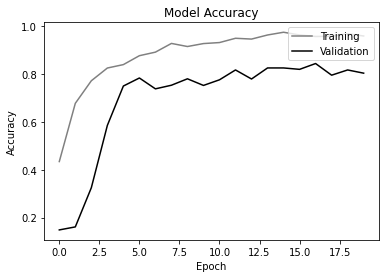

In [129]:
# Summarizing the history for accuracy

plt.plot(cnn_model_2_fit.history['accuracy'],color = 'Grey')
plt.plot(cnn_model_2_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

<b>CNN Model 3</b>

In [130]:
cnn_model_3 = Sequential()

# CNN
cnn_model_3.add(tf.keras.layers.InputLayer(input_shape=(resize_value,resize_value,3)))

cnn_model_3.add(BatchNormalization())
cnn_model_3.add(Convolution2D(filters=32, kernel_size= 3, activation='relu')) 
cnn_model_3.add(MaxPooling2D(pool_size=2))
cnn_model_3.add(Dropout(0.2))

cnn_model_3.add(Convolution2D(filters=32, kernel_size=4, padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
cnn_model_3.add(MaxPooling2D(pool_size=2))

cnn_model_3.add(Convolution2D(filters=64, kernel_size=3, padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
cnn_model_3.add(MaxPooling2D(pool_size=2))

cnn_model_3.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
cnn_model_3.add(MaxPooling2D(pool_size=2))

# Flattening for FC Layer
cnn_model_3.add(Flatten()) 

# FC layer
cnn_model_3.add(Dense(units = 128, kernel_initializer= 'he_normal', activation = keras.layers.LeakyReLU(alpha=0.1)))

cnn_model_3.add(Dense(units = 64, kernel_initializer= 'he_normal', activation = keras.layers.LeakyReLU(alpha=0.1)))

cnn_model_3.add(Dense(units = 32, kernel_initializer= 'he_normal',activation = keras.layers.LeakyReLU(alpha=0.1)))

cnn_model_3.add(Dense(units = 12, activation = 'softmax',kernel_initializer = 'he_normal', kernel_regularizer=regularizers.l2(0.0)))



In [131]:
cnn_model_3.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0003), loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [132]:
cnn_model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_17 (Bat  (None, 128, 128, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 63, 63, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)      

In [133]:
# Parameters for the model

epochs = 20
#batch_size = 100

In [134]:
cnn_model_3_fit = cnn_model_3.fit(X_train_scaled, y_train_dl, epochs = epochs, validation_data = (X_valid_scaled,y_valid_dl))

Epoch 1/20
112/112 [==============================] - 3s 21ms/step - loss: 2.0391 - accuracy: 0.2806 - val_loss: 2.2213 - val_accuracy: 0.2894
Epoch 2/20
112/112 [==============================] - 2s 18ms/step - loss: 1.3994 - accuracy: 0.5032 - val_loss: 1.7688 - val_accuracy: 0.5210
Epoch 3/20
112/112 [==============================] - 2s 18ms/step - loss: 1.0242 - accuracy: 0.6476 - val_loss: 1.1552 - val_accuracy: 0.6779
Epoch 4/20
112/112 [==============================] - 2s 17ms/step - loss: 0.8093 - accuracy: 0.7340 - val_loss: 0.8883 - val_accuracy: 0.7357
Epoch 5/20
112/112 [==============================] - 2s 18ms/step - loss: 0.6702 - accuracy: 0.7745 - val_loss: 0.7532 - val_accuracy: 0.7525
Epoch 6/20
112/112 [==============================] - 2s 18ms/step - loss: 0.4989 - accuracy: 0.8355 - val_loss: 0.7986 - val_accuracy: 0.7424
Epoch 7/20
112/112 [==============================] - 2s 17ms/step - loss: 0.4569 - accuracy: 0.8467 - val_loss: 0.7258 - val_accuracy: 0.7777

In [135]:
training_loss_3, training_accuracy_3 = cnn_model_3.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [136]:
validation_loss_3, validation_accuracy_3 = cnn_model_3.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [137]:
results = results.append({'Model_Name':'CNN_Model_3',
                          'training_Accuracy': training_accuracy_3,
                          'validation_Accuracy': validation_accuracy_3,
                          'training_Loss': training_loss_3,
                          'validation_Loss': validation_loss_3                                      
                          },
                         ignore_index=True
                         )

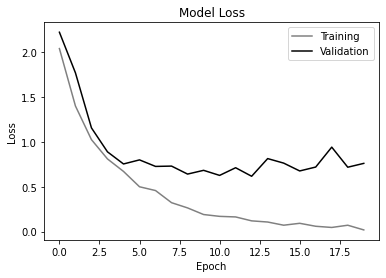

In [138]:
# Summarizing the history for loss

plt.plot(cnn_model_3_fit.history['loss'],color = 'Grey')
plt.plot(cnn_model_3_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

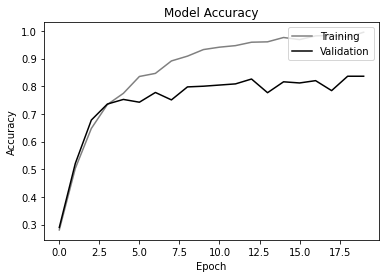

In [139]:
# Summarizing the history for accuracy

plt.plot(cnn_model_3_fit.history['accuracy'],color = 'Grey')
plt.plot(cnn_model_3_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

<b>CNN Model 4</b>

In [140]:
cnn_model_4 = Sequential()

# CNN
cnn_model_4.add(tf.keras.layers.InputLayer(input_shape=(resize_value,resize_value,3)))

cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Convolution2D(filters=32, kernel_size= 3, activation='relu')) 
cnn_model_4.add(MaxPooling2D(pool_size=2))

cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn_model_4.add(MaxPooling2D(pool_size=2))

cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_model_4.add(MaxPooling2D(pool_size=2))

cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Convolution2D(filters=256, kernel_size=2, padding='same', activation=keras.layers.LeakyReLU(alpha=0.01)))
cnn_model_4.add(MaxPooling2D(pool_size=2))

# Flattening data for FC layer
cnn_model_4.add(Flatten()) 

# FC layer
cnn_model_4.add(Dense(units = 128, activation = 'relu'))

cnn_model_4.add(Dense(units = 64, activation = 'relu'))

cnn_model_4.add(Dense(units = 32, activation = 'relu'))

cnn_model_4.add(Dense(units = 12, activation = 'softmax'))


In [141]:
cnn_model_4.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [142]:
cnn_model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_18 (Bat  (None, 128, 128, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_19 (Bat  (None, 63, 63, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 63, 63, 64)        32832     
                                                      

In [143]:
# Parameter values for fitting the model

epochs = 20
batch_size = 100

In [144]:
cnn_model_4_fit = cnn_model_4.fit(X_train_scaled, y_train_dl, epochs = epochs, validation_data = (X_valid_scaled,y_valid_dl))

Epoch 1/20
112/112 [==============================] - 4s 25ms/step - loss: 2.1349 - accuracy: 0.2593 - val_loss: 2.5194 - val_accuracy: 0.1485
Epoch 2/20
112/112 [==============================] - 2s 22ms/step - loss: 1.3228 - accuracy: 0.5583 - val_loss: 3.2736 - val_accuracy: 0.1485
Epoch 3/20
112/112 [==============================] - 2s 22ms/step - loss: 0.8371 - accuracy: 0.7357 - val_loss: 2.8716 - val_accuracy: 0.1871
Epoch 4/20
112/112 [==============================] - 2s 22ms/step - loss: 0.6225 - accuracy: 0.8022 - val_loss: 1.3761 - val_accuracy: 0.5017
Epoch 5/20
112/112 [==============================] - 2s 22ms/step - loss: 0.4663 - accuracy: 0.8621 - val_loss: 0.7592 - val_accuracy: 0.7416
Epoch 6/20
112/112 [==============================] - 2s 22ms/step - loss: 0.3438 - accuracy: 0.9041 - val_loss: 0.6017 - val_accuracy: 0.8112
Epoch 7/20
112/112 [==============================] - 2s 22ms/step - loss: 0.2907 - accuracy: 0.9264 - val_loss: 0.5465 - val_accuracy: 0.8230

In [145]:
training_loss_4, training_accuracy_4 = cnn_model_4.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [146]:
validation_loss_4, validation_accuracy_4 = cnn_model_4.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [147]:
results = results.append({'Model_Name':'CNN_Model_4',
                          'training_Accuracy': training_accuracy_4,
                          'validation_Accuracy': validation_accuracy_4,
                          'training_Loss': training_loss_4,
                          'validation_Loss': validation_loss_4                                      
                          },
                         ignore_index=True
                         )

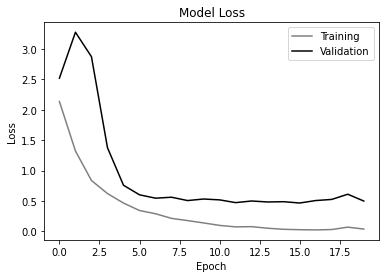

In [148]:
# Summarizing the history for loss

plt.plot(cnn_model_4_fit.history['loss'],color = 'Grey')
plt.plot(cnn_model_4_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

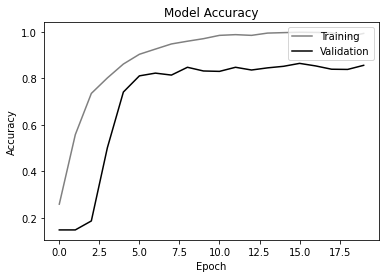

In [149]:
# Summarizing the history for accuracy

plt.plot(cnn_model_4_fit.history['accuracy'],color = 'Grey')
plt.plot(cnn_model_4_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

<b>[ CNN Model 5 ]</b>

In [150]:
cnn_model_5 = tf.keras.models.Sequential()

# CNN
cnn_model_5.add(tf.keras.layers.InputLayer(input_shape=(resize_value,resize_value,3)))

cnn_model_5.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
cnn_model_5.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_model_5.add(tf.keras.layers.BatchNormalization())
cnn_model_5.add(tf.keras.layers.Conv2D(64, kernel_size= 3, strides = (1,1), activation='relu'))
cnn_model_5.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_model_5.add(tf.keras.layers.BatchNormalization())
cnn_model_5.add(tf.keras.layers.Conv2D(128, kernel_size = 3, strides = (1,1), activation='relu'))
cnn_model_5.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_model_5.add(tf.keras.layers.BatchNormalization())
cnn_model_5.add(tf.keras.layers.Conv2D(128, kernel_size = 3, strides = (1,1), activation='relu'))
cnn_model_5.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_model_5.add(tf.keras.layers.GlobalMaxPool2D())

# Flattening data for FC layer
cnn_model_5.add(tf.keras.layers.Flatten())

# FC layer
cnn_model_5.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model_5.add(tf.keras.layers.Dropout(0.2))

cnn_model_5.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model_5.add(tf.keras.layers.BatchNormalization())

cnn_model_5.add(tf.keras.layers.Dense(12, activation='softmax')) 



In [151]:
cnn_model_5.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0005), loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [152]:
cnn_model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_22 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                      

In [153]:
# Parameter values for fitting the model

epochs = 50
batch_size = 100

In [154]:
cnn_model_5_fit = cnn_model_5.fit(X_train_scaled, y_train_dl, epochs = epochs, validation_data = (X_valid_scaled,y_valid_dl))

Epoch 1/50
112/112 [==============================] - 4s 24ms/step - loss: 2.1008 - accuracy: 0.3102 - val_loss: 2.9174 - val_accuracy: 0.1485
Epoch 2/50
112/112 [==============================] - 2s 19ms/step - loss: 1.3951 - accuracy: 0.5365 - val_loss: 3.2794 - val_accuracy: 0.1485
Epoch 3/50
112/112 [==============================] - 2s 19ms/step - loss: 1.0205 - accuracy: 0.6657 - val_loss: 4.4239 - val_accuracy: 0.1485
Epoch 4/50
112/112 [==============================] - 2s 19ms/step - loss: 0.7767 - accuracy: 0.7477 - val_loss: 3.4504 - val_accuracy: 0.1971
Epoch 5/50
112/112 [==============================] - 2s 19ms/step - loss: 0.6154 - accuracy: 0.8036 - val_loss: 1.7481 - val_accuracy: 0.3599
Epoch 6/50
112/112 [==============================] - 2s 19ms/step - loss: 0.5313 - accuracy: 0.8283 - val_loss: 1.3993 - val_accuracy: 0.5344
Epoch 7/50
112/112 [==============================] - 2s 19ms/step - loss: 0.4870 - accuracy: 0.8406 - val_loss: 0.6085 - val_accuracy: 0.7903

In [155]:
training_loss_5, training_accuracy_5 = cnn_model_5.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [156]:
validation_loss_5, validation_accuracy_5 = cnn_model_5.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [157]:
results = results.append({'Model_Name':'CNN_Model_5',
                          'training_Accuracy': training_accuracy_5,
                          'validation_Accuracy': validation_accuracy_5,
                          'training_Loss': training_loss_5,
                          'validation_Loss': validation_loss_5                                      
                          },
                         ignore_index=True
                         )

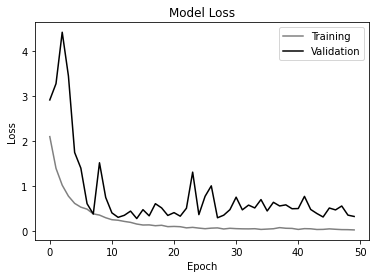

In [158]:
# Summarizing the history for loss

plt.plot(cnn_model_5_fit.history['loss'],color = 'Grey')
plt.plot(cnn_model_5_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

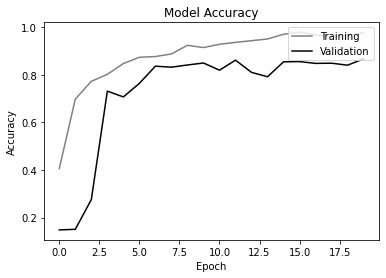

In [159]:
# Summarizing the history for accuracy

plt.plot(cnn_model_1_fit.history['accuracy'],color = 'Grey')
plt.plot(cnn_model_1_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

<b>[ CNN Model 6 ]</b>

Applying data augumentation using Image Data Generator using Keras and checking the results 

In [160]:
cnn_model_6 = tf.keras.models.Sequential()

# CNN
cnn_model_6.add(tf.keras.layers.InputLayer(input_shape=(resize_value,resize_value,3)))

cnn_model_6.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
cnn_model_6.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_model_6.add(tf.keras.layers.BatchNormalization())
cnn_model_6.add(tf.keras.layers.Conv2D(64, kernel_size= 3, strides = (1,1), activation='relu'))
cnn_model_6.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_model_6.add(tf.keras.layers.BatchNormalization())
cnn_model_6.add(tf.keras.layers.Conv2D(128, kernel_size = 3, strides = (1,1), activation='relu'))
cnn_model_6.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_model_6.add(tf.keras.layers.BatchNormalization())
cnn_model_6.add(tf.keras.layers.Conv2D(128, kernel_size = 3, strides = (1,1), activation='relu'))
cnn_model_6.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_model_6.add(tf.keras.layers.GlobalMaxPool2D())

# Flattening data for FC layer
cnn_model_6.add(tf.keras.layers.Flatten())

# FC layer
cnn_model_6.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model_6.add(tf.keras.layers.Dropout(0.2))

cnn_model_6.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model_6.add(tf.keras.layers.BatchNormalization())

cnn_model_6.add(tf.keras.layers.Dense(12, activation='softmax')) 



In [161]:
cnn_model_6.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.005), loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [162]:
cnn_model_6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_26 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                      

In [163]:
# Parameter values for fitting the model

epochs = 100
batch_size = 100

In [164]:
image_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [165]:
image_augmentation.fit(X_train_scaled)

In [166]:
cnn_model_6_fit = cnn_model_6.fit_generator(image_augmentation.flow(X_train_scaled, y_train_dl, batch_size=batch_size), validation_data=(X_valid_scaled, y_valid_dl), epochs=epochs)

Epoch 1/100
36/36 [==============================] - 4s 67ms/step - loss: 2.2520 - accuracy: 0.2375 - val_loss: 3.1453 - val_accuracy: 0.1485
Epoch 2/100
36/36 [==============================] - 2s 48ms/step - loss: 1.7047 - accuracy: 0.3983 - val_loss: 5.3314 - val_accuracy: 0.0512
Epoch 3/100
36/36 [==============================] - 2s 48ms/step - loss: 1.3354 - accuracy: 0.5446 - val_loss: 5.5524 - val_accuracy: 0.0503
Epoch 4/100
36/36 [==============================] - 2s 48ms/step - loss: 1.0748 - accuracy: 0.6319 - val_loss: 6.8590 - val_accuracy: 0.0503
Epoch 5/100
36/36 [==============================] - 2s 48ms/step - loss: 0.9093 - accuracy: 0.6912 - val_loss: 10.9863 - val_accuracy: 0.1485
Epoch 6/100
36/36 [==============================] - 2s 48ms/step - loss: 0.7632 - accuracy: 0.7326 - val_loss: 11.1974 - val_accuracy: 0.1485
Epoch 7/100
36/36 [==============================] - 2s 48ms/step - loss: 0.6623 - accuracy: 0.7695 - val_loss: 8.9038 - val_accuracy: 0.1485
Epoc

In [167]:
training_loss_6, training_accuracy_6 = cnn_model_6.evaluate(X_train_scaled, y_train_dl, verbose = 0)

In [168]:
validation_loss_6, validation_accuracy_6 = cnn_model_6.evaluate(X_valid_scaled, y_valid_dl, verbose = 0)

In [169]:
results = results.append({'Model_Name':'CNN_Model_6',
                          'training_Accuracy': training_accuracy_6,
                          'validation_Accuracy': validation_accuracy_6,
                          'training_Loss': training_loss_6,
                          'validation_Loss': validation_loss_6                                      
                          },
                         ignore_index=True
                         )

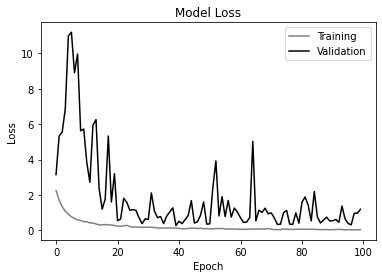

In [170]:
# Summarizing the history for loss

plt.plot(cnn_model_6_fit.history['loss'],color = 'Grey')
plt.plot(cnn_model_6_fit.history['val_loss'],color = 'Black')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

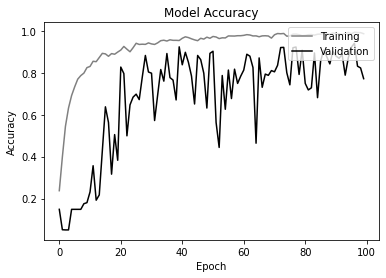

In [171]:
# Summarizing the history for accuracy

plt.plot(cnn_model_6_fit.history['accuracy'],color = 'Grey')
plt.plot(cnn_model_6_fit.history['val_accuracy'],color = 'Black')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

After using the Image Data Generator, we can see that the model became too much unstable

## 3. Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case

In [172]:
# Displaying the results (Accuracy)

results[['Model_Name','training_Accuracy','validation_Accuracy']].style.background_gradient(cmap='viridis')

,Model_Name,training_Accuracy,validation_Accuracy
0,Random Forest,0.266016,0.164430
1,Logistic Regression,0.222656,0.116611
2,SVC,0.191889,0.115772
3,ANN_Model_1,0.488951,0.317953
4,ANN_Model_2,0.967552,0.484060
5,ANN_Model_3,0.948811,0.491611
6,CNN_Model_1,0.987692,0.867450
7,CNN_Model_2,0.961678,0.802852
8,CNN_Model_3,1.000000,0.836409
9,CNN_Model_4,0.999720,0.856544


In [173]:
# Displaying the results (Loss)

results[['Model_Name','training_Loss','validation_Loss']].style.background_gradient(cmap='rocket_r')

,Model_Name,training_Loss,validation_Loss
0,Random Forest,nan,nan
1,Logistic Regression,nan,nan
2,SVC,nan,nan
3,ANN_Model_1,2.793716,5.130142
4,ANN_Model_2,0.593407,1.703265
5,ANN_Model_3,0.656781,1.633287
6,CNN_Model_1,0.040577,0.592276
7,CNN_Model_2,0.104188,0.911393
8,CNN_Model_3,0.006488,0.759782
9,CNN_Model_4,0.012335,0.499413


<b>Observations :</b>


*   We first started with Supervised Learning models where we implemented Random Forest, Light GBM, ADA Boost, Logistic Regression and SVC. Few of the models were commented out owing to the higher execution time involved while hyperparameter tuning.Here, we observed that despite various measures we were not able to achieve good results and hence by seeing the stats we can conclude that supervised learning approach might not be a good approach to image classification.It was also observed that the hyperaparmeter tuning process was also slow or moderate.So, we moved to ANN to get better results.

*   Since we were not satisfied with the supervised learning approach we moved to ANN now. In ANN models, we had better results than supervised but the model was overfitting too much despite tweaking various hyperparameters and adjusting the architecture.Also, the validation accuracy was not satisfactory and so we moved to CNN in hope for better results.

*   Owing to unsatisfactory results we moved to CNN. Here, we got much better results than previous appraoches which was expected as CNN captures important feature automatically, reduces overfitting, has much fewer parameters to learn and does contextualization in small neighborhood and hence good for images. We tweaked the model architecture and hyperparameters to get the best results which got eventually.Using CNN, the loss was reduced a lot and better accuracy was observed while at the same time the overfitting was reduced.Out of all models, CNN_Model_5 and CNN_Model_4 gave the best results.Though there are few peaks in the loss function in CNN_Model_5, the model's performance is best out of all. CNN_Model_4 has a smooth loss function but overfitting is more.So, based on performance we will choose CNN_Model_5 as our final model.



## 4. Pickle the best performing model

In [181]:
# Creating a HDF5 file to save the model and weights

cnn_model_5.save('my_final_model.h5')  
cnn_model_5.save_weights('my_final_model_weights.h5')

In [182]:
# Loading the model to check consistency

final_model_loaded = load_model('my_final_model.h5')

In [183]:
# Checking the summary of final_model

final_model_loaded.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_22 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                      

## 5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained image classifier model to predict the class

Since, we have already resized the image we shall be doing reshaping and predicting the class of the test image

In [185]:
test_image = np.reshape(img_pred_resize, [1, 128, 128, 3])
pred = np.argmax(final_model_loaded.predict(test_image),axis=1)

In [188]:
print('The class of the predicted image is : ', pred,' (Class Label Number) ', enc2.classes_[pred][0], ' (Class Name) ')

The class of the predicted image is :  [7]  (Class Label Number)  Maize  (Class Name) 


Hence, we can see that the class label number is 7 and the name is Maize.